## 1. 단순이동평균 (SMA)

- 이동기술통계량: 시간의 흐름에 따라 일정기간 동안 수치자료의 기술 통계량을 계산한 값
- df.rolling().함수() : 이동기술통계량을 계산. 뒤에 함수에 mean, median, std, var, max, min, sum 등 대입

df['5일이동평균 확진자'] = df['총확진자'].rolling(5).mean()    # 총확진자 5일간격으로 이동평균 계산

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
# 2020년 8월부터 일요일 8개를 조회
# start : 시작일, periods : 생성할 날짜의 개수, freq: 생성할 날짜의 주기
dates = pd.date_range(start = '2020-08', periods = 8, freq = 'W')
dates

DatetimeIndex(['2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [4]:
df = pd.DataFrame({
    'week': dates,
    'sales': [39, 44, 40, 45, 38, 43, 39, np.nan],
    '3MA': [0]*8
})
df

,week,sales,3MA
0,2020-08-02,39.0,0
1,2020-08-09,44.0,0
2,2020-08-16,40.0,0
3,2020-08-23,45.0,0
4,2020-08-30,38.0,0
5,2020-09-06,43.0,0
6,2020-09-13,39.0,0
7,2020-09-20,NaN,0


In [6]:
(39 + 44 + 40) / 3

41.0

In [7]:
(44 + 40 + 45) / 3

43.0

In [7]:
# 0~2주차 평균을 3주차에 shift해서 적용
df['3MA'] = df[['sales']].rolling(3).mean().shift(1)
df

,week,sales,3MA
0,2020-08-02,39.0,NaN
1,2020-08-09,44.0,NaN
2,2020-08-16,40.0,NaN
3,2020-08-23,45.0,41.0
4,2020-08-30,38.0,43.0
5,2020-09-06,43.0,41.0
6,2020-09-13,39.0,42.0
7,2020-09-20,NaN,40.0


## 2. 애플주가로 단순이동평균 실시

In [12]:
# import FinanceDataReader as fdr
import yfinance as yf

In [ ]:
# # 2010년 ~ 현재까지의 애플 주가를 데이터 프레임으로 불러오기
# df_apple = fdr.DataReader('AAPL', start = '2010')

In [19]:
df_apple = yf.download('AAPL', start = '2010-01-01')
df_apple

c:\Users\Master\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362818,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351059,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800
...,...,...,...,...,...,...
2024-10-21,234.449997,236.850006,234.449997,236.479996,236.479996,36254500
2024-10-22,233.889999,236.220001,232.600006,235.860001,235.860001,38846600
2024-10-23,234.080002,235.139999,227.759995,230.759995,230.759995,52287000


원본 데이터

<Axes: xlabel='Date'>

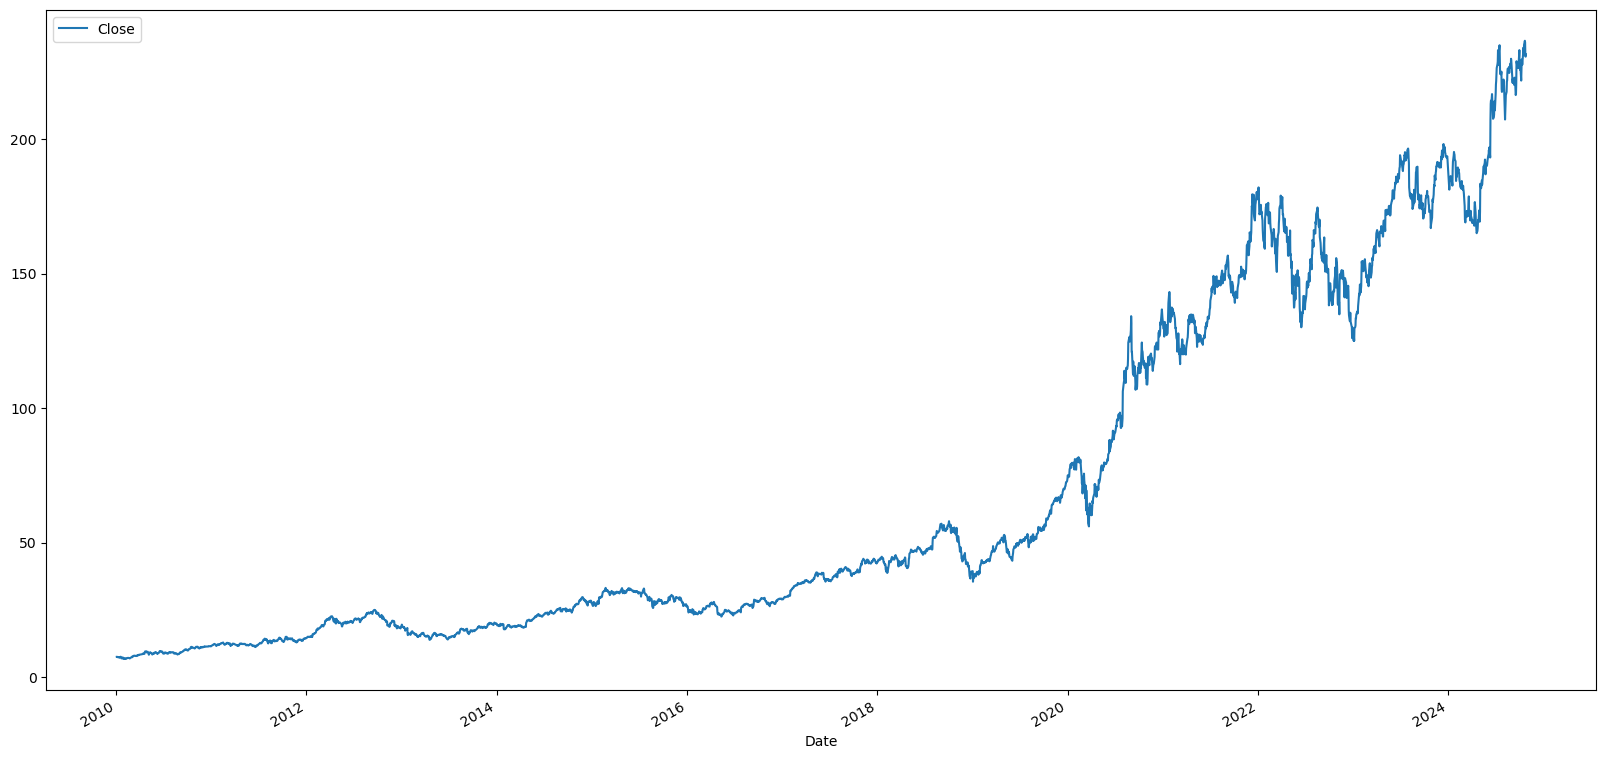

In [27]:
df_apple[['Close']].plot(figsize = (20, 10))

7일 단순 이동평균

Text(0.5, 1.0, 'Close Price for Apple')

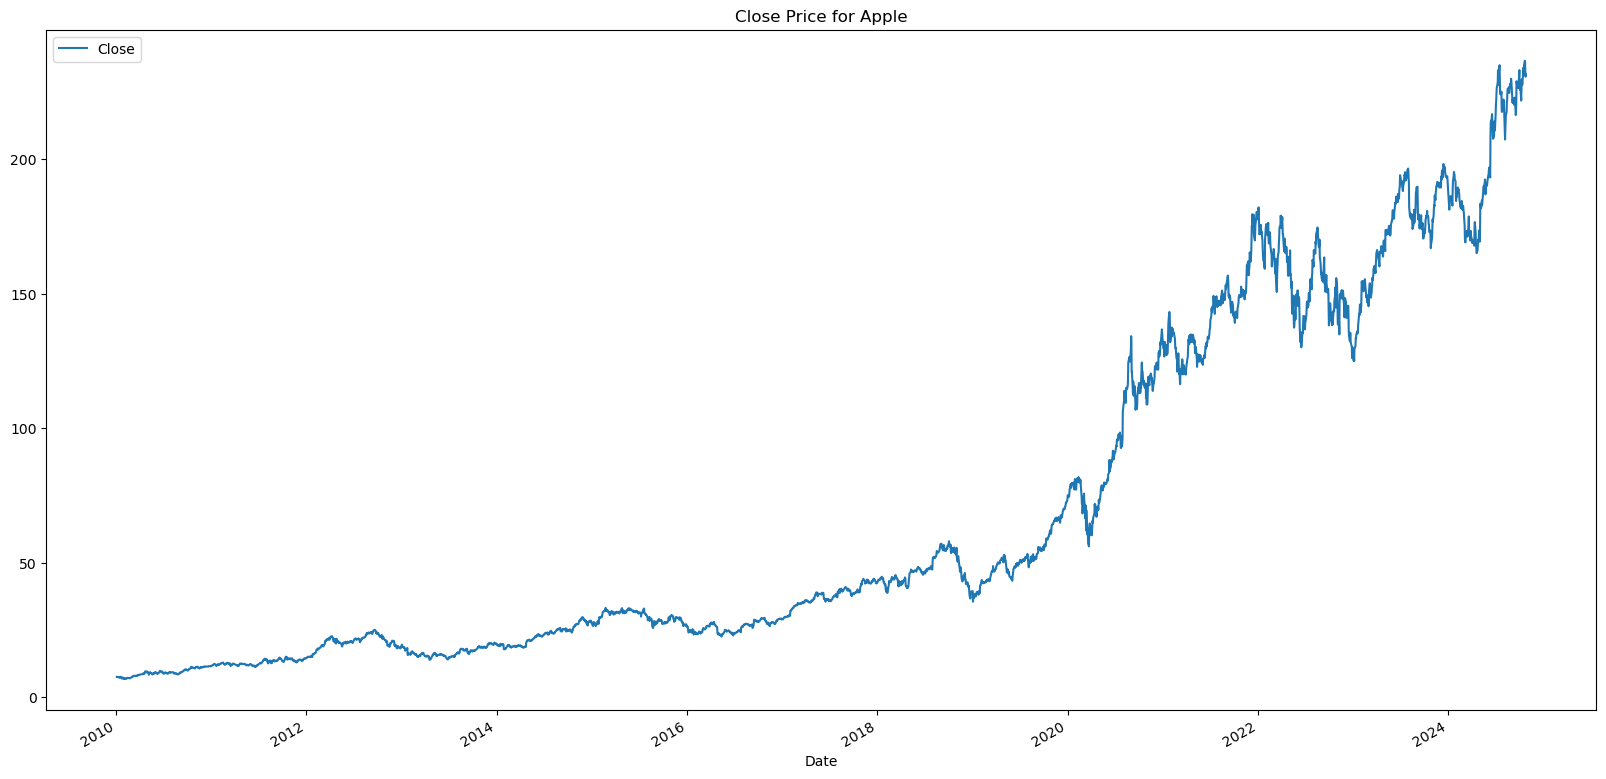

In [28]:
df_apple[['Close']].plot(figsize = (20, 10))
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
plt.title('Close Price for Apple')

2개의 데이터 추세선 비교

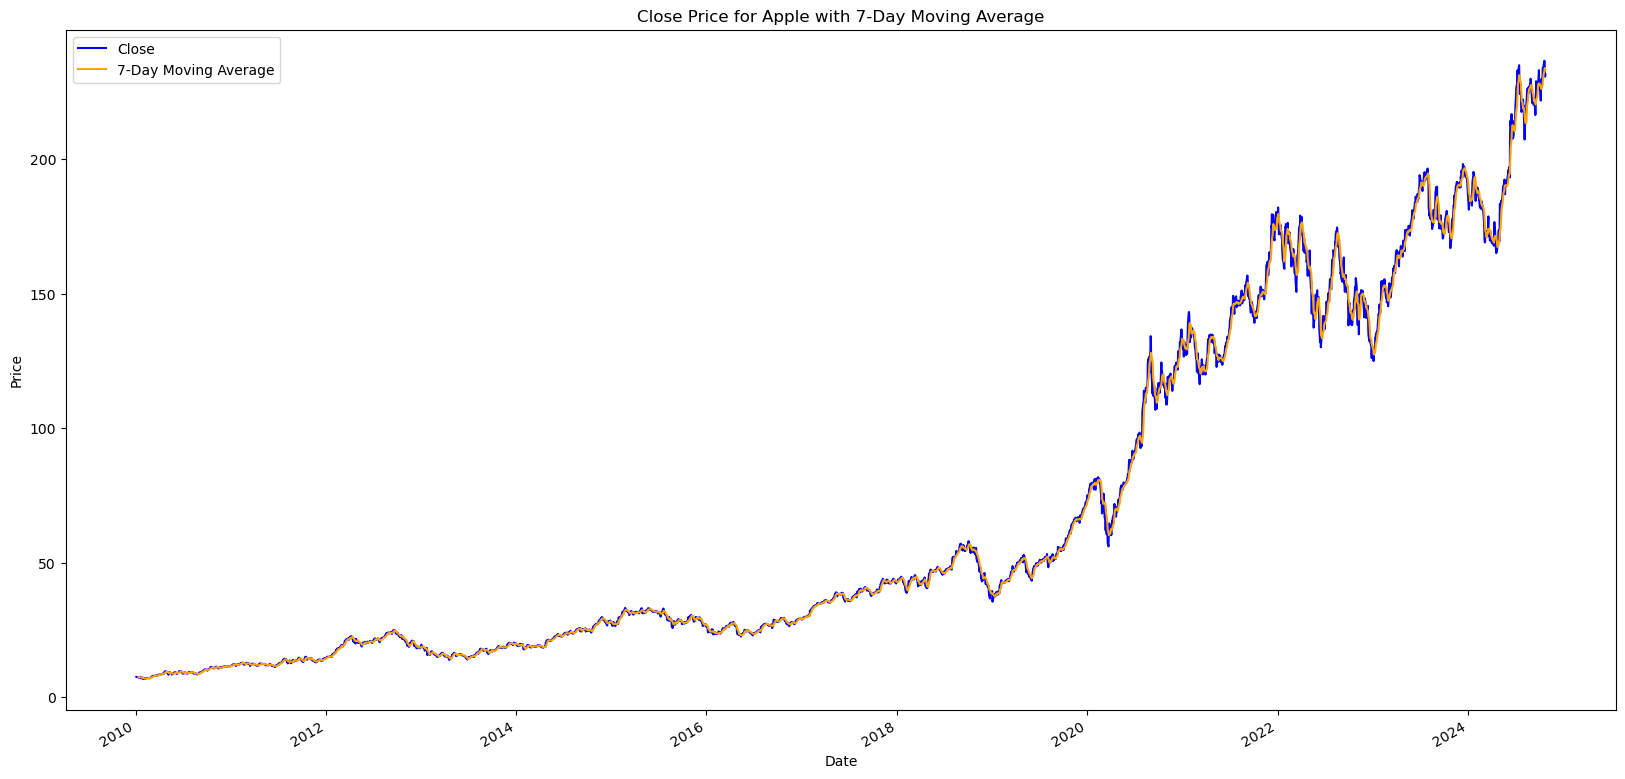

In [30]:
import matplotlib.pyplot as plt

# Close 데이터 그래프
df_apple['Close'].plot(figsize=(20, 10), color='blue', label='Close')

# 7일 이동평균 계산 후 그래프 추가
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
df_apple['Close_7Days_Mean'].plot(color='orange', label='7-Day Moving Average')

# 그래프 제목, 레이블 추가
plt.title('Close Price for Apple with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()  # 범례 추가

plt.show()


### 1) 원본데이터 vs 7일 단순이동평균 vs 30일 단순이동평균

<Axes: xlabel='Date'>

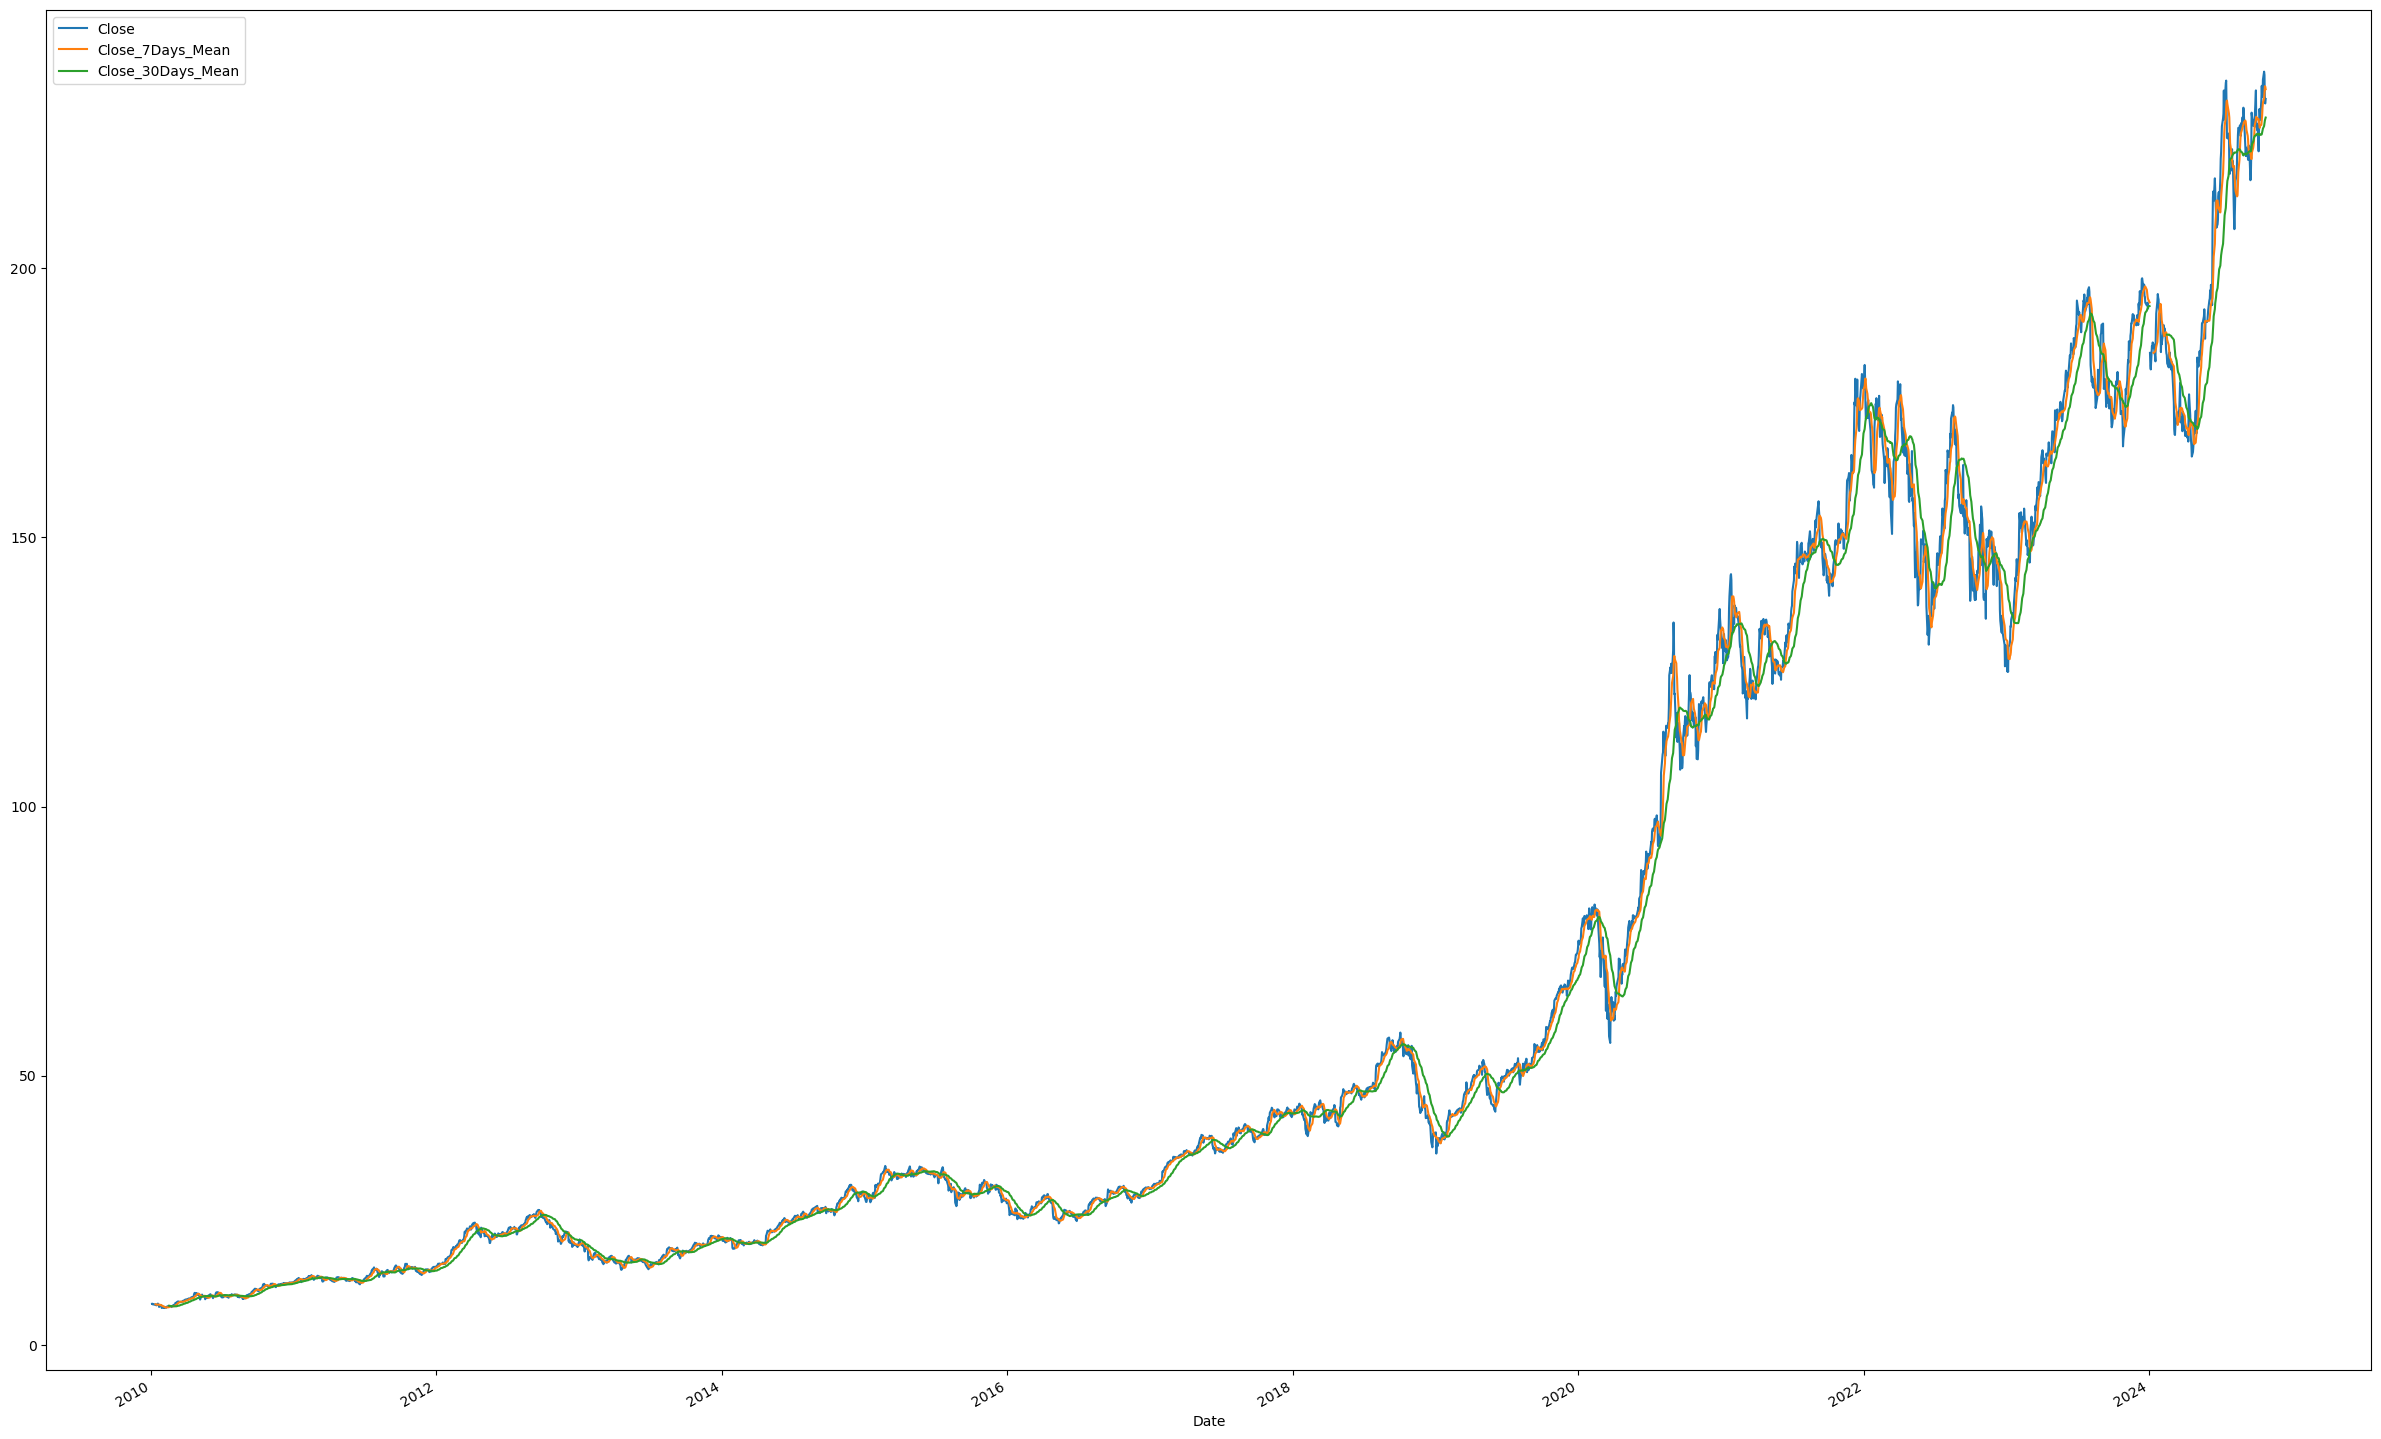

In [31]:
last_day = datetime(2024, 1, 2)
df_apple.loc[last_day, 'Close'] = np.nan
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean().shift(1)
df_apple['Close_30Days_Mean'] = df_apple['Close'].rolling(30).mean().shift(1)
df_apple[['Close', 'Close_7Days_Mean', 'Close_30Days_Mean']].plot(figsize = (30, 20))

### 2) resample 함수를 사용해서 월별 평균 데이터 셋 구성 방법

In [34]:
# 원본 데이터에서 월별 평균 데이터 셋으로 구성
df_apple_monthly = df_apple.resample(rule='M').mean()
df_apple_monthly

C:\Users\Master\AppData\Local\Temp\ipykernel_20840\4021649183.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_apple_monthly = df_apple.resample(rule='M').mean()


,Open,High,Low,Close,Adj Close,Volume,Close_7Days_Mean,Close_30Days_Mean
Date,,,,,,,,
2010-01-31,7.478910,7.543835,7.332162,7.418402,6.264657,7.983681e+08,7.459345,NaN
2010-02-28,7.074718,7.159117,7.011523,7.099850,5.995647,5.671621e+08,7.092516,7.230500
2010-03-31,7.957034,8.024301,7.903043,7.978960,6.738034,5.284423e+08,7.786127,7.391509
2010-04-30,8.964337,9.040595,8.861429,8.969592,7.574598,5.889109e+08,8.751040,8.238821
2010-05-31,8.999268,9.129214,8.743678,8.980768,7.584036,9.041327e+08,9.090434,8.977501
...,...,...,...,...,...,...,...,...
2024-06-30,205.994735,209.036318,203.920001,206.263158,206.024686,9.073603e+07,201.969548,190.819052
2024-07-31,224.597726,226.670911,222.029999,224.598637,224.338966,5.241363e+07,223.076494,212.210591
2024-08-31,220.755455,223.718636,218.740909,221.638182,221.559664,5.103032e+07,220.072598,221.519789


Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

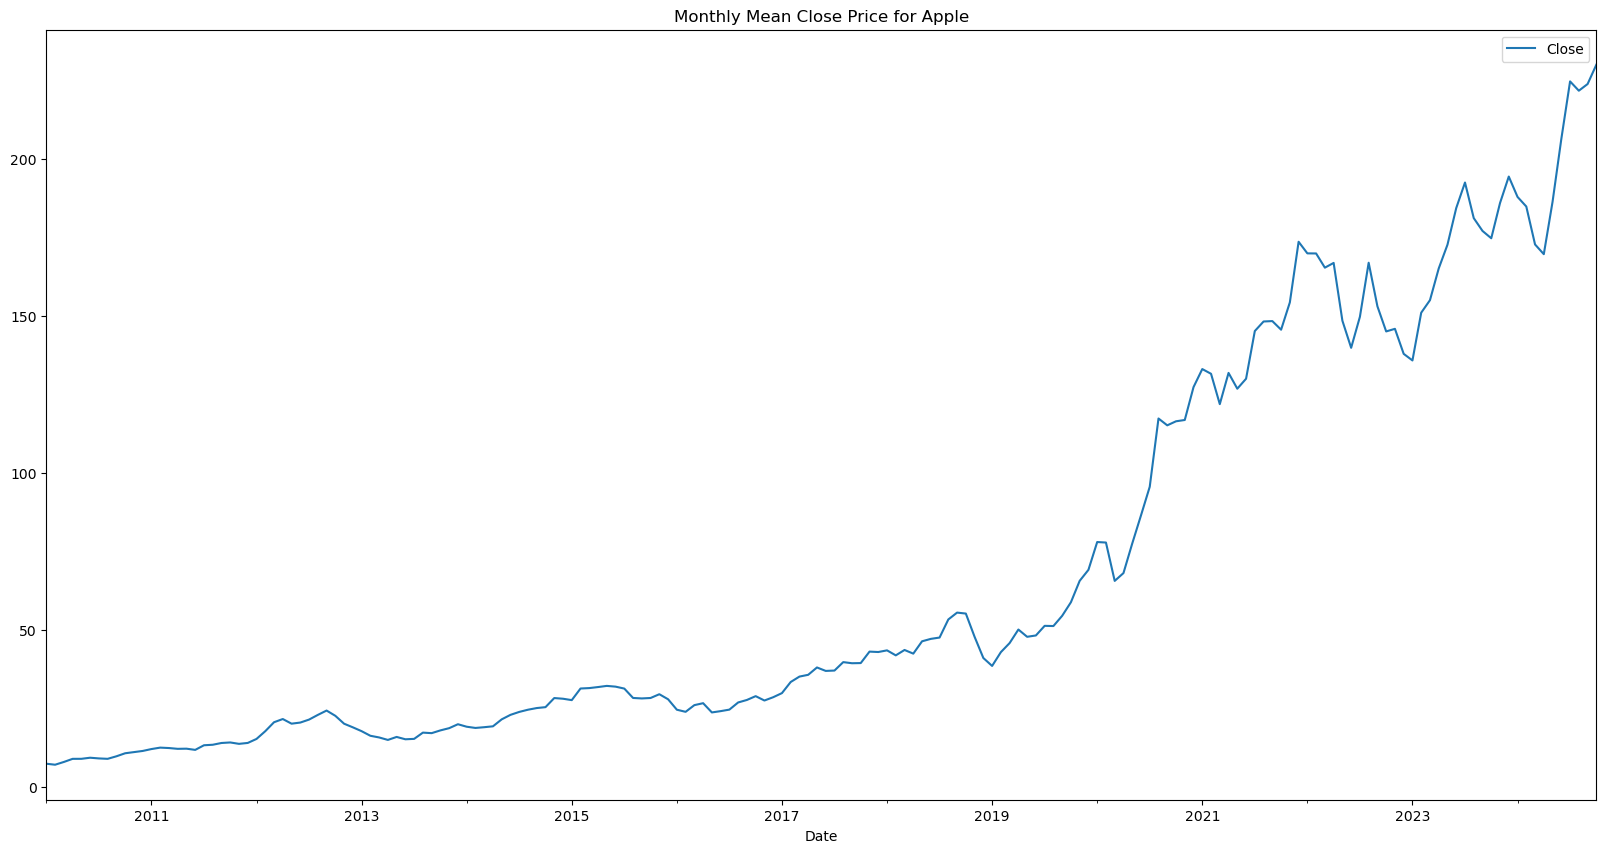

In [35]:
# 마지막 컬럼(Close_7Days_Mean) 제외
df_apple_monthly = df_apple_monthly.iloc[:,:-1]
# 월별 주가(종가)를 시각화
df_apple_monthly[['Close']].plot(figsize=(20,10))
plt.title('Monthly Mean Close Price for Apple')

## 3. 지수 이동 평균법 (EMA)

<Axes: xlabel='index'>

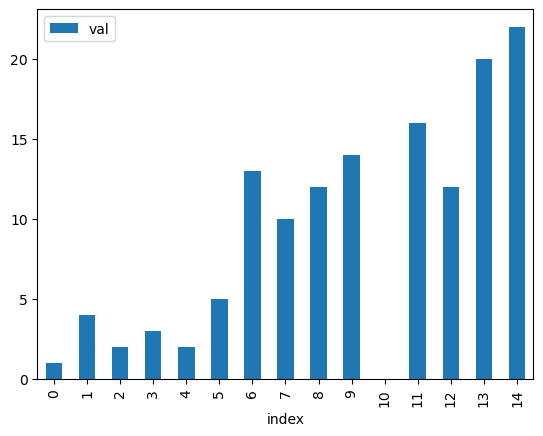

In [40]:
data = {'val' : [1, 4, 2, 3, 2, 5, 13, 10, 12, 14, np.NaN, 16, 12, 20, 22]}
df = pd.DataFrame(data).reset_index()
# df['val'].plot.bar(rot = 0, subplots = True)
df.plot(kind = 'bar', x = 'index', y = 'val')

In [41]:
df2 = df.assign(ewm = df['val'].ewm(alpha = 0.3).mean())
df2

,index,val,ewm
0,0,1.0,1.000000
1,1,4.0,2.764706
2,2,2.0,2.415525
3,3,3.0,2.646269
4,4,2.0,2.413220
5,5,5.0,3.292727
6,6,13.0,6.466263
7,7,10.0,7.591237
8,8,12.0,8.969483
9,9,14.0,10.522507


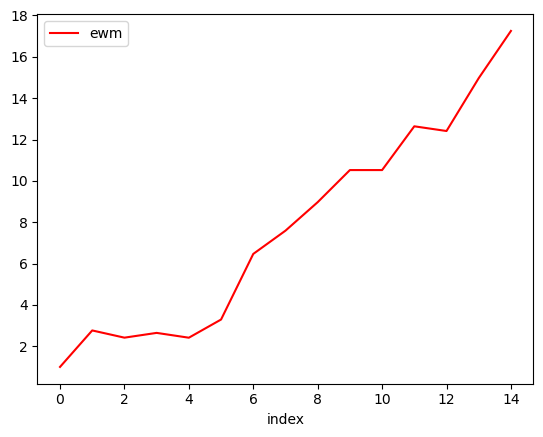

In [45]:
# ax = df.plot(kind = 'bar', x = 'index', y = 'val')
ax2 = df2.plot(kind = 'line', x = 'index', y = 'ewm', color = 'red')

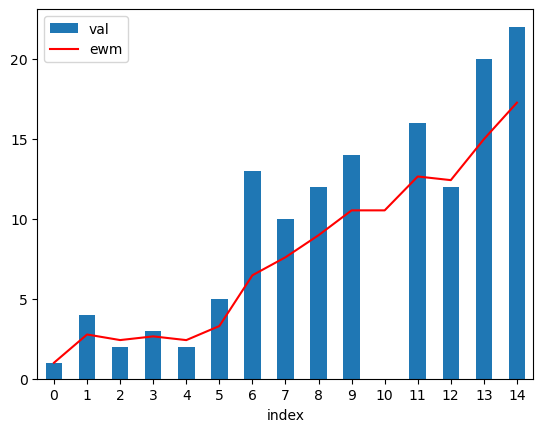

In [24]:
df2 = df.assign(ewm = df['val'].ewm(alpha = 0.3).mean())
ax = df.plot(kind = 'bar', x = 'index', y = 'val')
ax2 = df2.plot(kind = 'line', x = 'index', y = 'ewm', color = 'red', ax = ax)
plt.show()

In [46]:
def myEWMA(data, span):
    ewma = [0]*len(data) # 지수 이동 평균을 계산해서 저장할 리스트
    molecule = 0         # 지수 이동 평균의 분자
    denominator = 0      # 지수 이동 평균의 분모
    alpha = 2.0 / (1.0 + span)  # 값에 곱해지는 가중치
    for i in range(len(data)):
        molecule = (data[i] + (1.0 - alpha) * molecule) # 분자 계산 data + (1 - alpha)앞의 데이터
        denominator += (1 - alpha) ** i                 # 분모 계산 (1-alpha)의 i승
        print('index: ', i)
        print('molecule: ', molecule)
        print('denominator: ', denominator)
        # 지수 이동 평균 계산
        ewma[i] = molecule/denominator
        print('ewma', ewma[i])
        print('='*100)
        return ewma    

In [48]:
myEWMA(df_apple, 0)

KeyError: 0